# Homework 3

## Pair Programming Group Number: 17
## Members of Team: Emily Zhou, Elena Zhang

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('melb_data_sold_train.csv')

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
#list wise deletion and reset index
df1 = df.dropna().reset_index().drop(columns='index')
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    
    #radius as constant
    r = 6371.0088
    
    #convert degrees to radians
    pt1_rad = np.radians(pt1)
    pt2_rad = np.radians(pt2)
    
    pt1_lat = pt1_rad[0]
    pt1_lon = pt1_rad[1]
    
    pt2_lat = pt2_rad[0]
    pt2_lon = pt2_rad[1]
    
    #difference in latitude of points
    lat_diff = pt2_lat - pt1_lat
    
    #difference in longitude of points
    lon_diff = pt2_lon - pt1_lon
    
    #portions of haversine formula
    sin_sq_lat = np.sin(lat_diff/2)**2
    sin_sq_lon = np.sin(lon_diff/2)**2
    cos_sin_sq_lon = np.cos(pt1_lat) * np.cos(pt2_lat) * sin_sq_lon
    
    #sum of portions
    sum = sin_sq_lat + cos_sin_sq_lon
    
    #square root the sum
    sqrt = np.sqrt(sum)
    
    #final product
    distance = 2 * r * np.arcsin(sqrt)
    
    return distance

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])
#haversine_distance(toorak_pt,[-37.94633,145.04947])

30.244772513569124

In [5]:
#add new column to df1
df1['distance_to_toorak']=df1[['Lattitude','Longtitude']].apply(lambda x: haversine_distance(toorak_pt,x),axis=1)

#rename df1 to df2
df2 = df1

## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
#add one hot encoding columns
df2.insert(3,'h',pd.get_dummies(df2['Type'])['h'])
df2.insert(4,'u',pd.get_dummies(df2['Type'])['u'])
df2.insert(5,'t',pd.get_dummies(df2['Type'])['t'])

#remove original "Type" columns and save new dataframe as df3
df3 = df2.drop(columns=['Type'])
df3

,Suburb,Address,Rooms,h,u,t,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,1,0,0,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,1,0,0,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,1,0,0,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,1,0,0,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,0,1,0,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,1,0,0,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,1,0,0,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,0,0,1,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,0,0,1,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
#find correlation matrix for attributes in df3
df3.corr(method='pearson')

,Rooms,h,u,t,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Rooms,1.000000,0.501128,-0.535102,-0.040762,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
h,0.501128,1.000000,-0.778062,-0.484749,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
u,-0.535102,-0.778062,1.000000,-0.172282,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
t,-0.040762,-0.484749,-0.172282,1.000000,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
Price,0.502814,0.391761,-0.372766,-0.095295,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,0.054676,-0.040504,0.051754,-0.008546,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.941684,0.484612,-0.518941,-0.037366,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.593847,0.181773,-0.282390,0.108148,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.401716,0.214175,-0.236298,-0.006836,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.085676,0.047422,-0.005103,-0.067257,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
#select all numeric attributes
all_numeric = df3.select_dtypes(np.number)
#create X matrix with 1 coefficients
X = pd.concat([pd.DataFrame({'intercept':np.ones(len(df3))}),all_numeric],axis=1).drop(columns='Price')
X

,intercept,Rooms,h,u,t,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,1.0,2,1,0,0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4.261612
1,1.0,3,1,0,0,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4.621843
2,1.0,2,1,0,0,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4.374206
3,1.0,2,1,0,0,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4.780655
4,1.0,2,0,1,0,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,-37.80780,144.99650,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,3,1,0,0,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,-37.70425,144.93164,16.998846
3906,1.0,4,1,0,0,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,-37.70077,145.12743,18.491623
3907,1.0,3,0,0,1,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,-37.94775,145.02379,11.798784
3908,1.0,4,0,0,1,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,-37.94633,145.04947,11.986684


In [9]:
# Step two, build the column vector y
y = df3['Price']

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
(beta_hat, residual, rank, s) = np.linalg.lstsq(X,y,rcond=-1)
beta_hat

array([ 8.68773594e+06,  1.37519623e+05,  3.07004856e+06,  2.73755518e+06,
        2.88013220e+06,  6.35591132e+02,  2.57774471e+04,  2.03540724e+05,
        5.44025948e+04,  1.94402030e+01,  1.22151756e+03, -3.11155825e+03,
       -6.16718945e+05, -2.09209148e+05, -4.35776171e+04])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

668241.429430821

In [12]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
mbs_test = pd.read_csv('melb_data_sold_test.csv')
filled_mbs_test = mbs_test.fillna(method='ffill').fillna(method='bfill')
#filled_mbs_test.isna().any()
#filled_mbs_test

In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame

#add distance_to_toorak to new data frame
filled_mbs_test['distance_to_toorak']=filled_mbs_test[['Lattitude','Longtitude']].apply(lambda x: haversine_distance(toorak_pt,x),axis=1)

#add one hot encoding columns
filled_mbs_test.insert(3,'h',pd.get_dummies(filled_mbs_test['Type'])['h'])
filled_mbs_test.insert(4,'u',pd.get_dummies(filled_mbs_test['Type'])['u'])
filled_mbs_test.insert(5,'t',pd.get_dummies(filled_mbs_test['Type'])['t'])

#remove original "Type" column
filled_mbs_test.drop(columns=['Type'])

,Suburb,Address,Rooms,h,u,t,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Jacana,29 Fox Ct,3,1,0,0,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,222.0,1980.0,Hume,-37.68907,144.91459,Northern Metropolitan,19.181567
1,Keilor Park,45 Collinson St,3,1,0,0,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263068
2,Kensington,42 Gower St,3,1,0,0,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,222.0,1980.0,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296810
3,Kew,6/385 Barkers Rd,3,0,0,1,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168250
4,Kew,11 Raheen Dr,4,1,0,0,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,1,0,0,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,Whittlesea,-37.86887,145.22116,Eastern Metropolitan,18.262739
1017,Werribee,5 Nuragi Ct,4,1,0,0,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,Whittlesea,-37.89327,144.64789,Western Metropolitan,32.814349
1018,Westmeadows,9 Black St,3,1,0,0,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,172.0,1980.0,Whittlesea,-37.67917,144.89390,Northern Metropolitan,21.030518
1019,Wheelers Hill,12 Strada Cr,4,1,0,0,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,172.0,1981.0,Whittlesea,-37.90562,145.16761,South-Eastern Metropolitan,15.081333


In [15]:
# Step two, build the attribute matrix Xdot 
#select all numeric attributes
all_numeric = filled_mbs_test.select_dtypes(np.number)
#create Xdot matrix with 1 coefficients
Xdot = pd.concat([pd.DataFrame({'intercept':np.ones(len(filled_mbs_test))}),all_numeric],axis=1).drop(columns='Price')
Xdot

,intercept,Rooms,h,u,t,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,1.0,3,1,0,0,3047.0,3.0,1.0,4.0,764.0,222.0,1980.0,-37.68907,144.91459,19.181567
1,1.0,3,1,0,0,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,-37.72224,144.85739,19.263068
2,1.0,3,1,0,0,3031.0,3.0,1.0,0.0,190.0,222.0,1980.0,-37.79560,144.92779,9.296810
3,1.0,3,0,0,1,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,-37.81614,145.05056,4.168250
4,1.0,4,1,0,0,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,-37.80437,145.01725,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1.0,4,1,0,0,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,-37.86887,145.22116,18.262739
1017,1.0,4,1,0,0,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,32.814349
1018,1.0,3,1,0,0,3049.0,3.0,2.0,2.0,256.0,172.0,1980.0,-37.67917,144.89390,21.030518
1019,1.0,4,1,0,0,3150.0,4.0,2.0,2.0,652.0,172.0,1981.0,-37.90562,145.16761,15.081333


In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
Xdot_array = Xdot.to_numpy()
y_hat = np.matmul(Xdot_array,beta_hat)
y_hat

array([ 820835.53968547,  941206.494313  , 1075588.68078583, ...,
        763540.88766615, 1337264.09723058, 1331915.6395698 ])

In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
abs_err = np.abs(filled_mbs_test['Price'] - y_hat)
abs_err

0       2.003355e+05
1       1.912065e+05
2       1.558868e+04
3       6.299388e+04
4       1.099795e+06
            ...     
1016    1.363864e+05
1017    9.675236e+04
1018    1.815409e+05
1019    9.226410e+04
1020    1.619156e+05
Name: Price, Length: 1021, dtype: float64

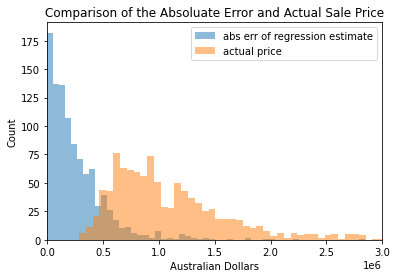

In [18]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 

#absolute error and actual price histrograms
plt.hist(abs_err,bins=1000,alpha=0.5,label='abs err of regression estimate')
plt.hist(filled_mbs_test['Price'],bins=100,alpha=0.5,label='actual price')

#label the plot
plt.xlim(left=0,right=3000000)
plt.xlabel('Australian Dollars')
plt.ylabel('Count')
plt.title('Comparison of the Absoluate Error and Actual Sale Price')
plt.legend(loc='upper right')
plt.show()